In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
f_minist = tf.keras.datasets.fashion_mnist

In [ ]:
(X_train_full,y_train_full),(X_test,y_test) = f_minist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_train_full.dtype

dtype('uint8')

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_test.dtype

dtype('uint8')

In [ ]:
X_test.shape,X_test.dtype

((10000, 28, 28), dtype('uint8'))

In [ ]:
X_valid,X_train = X_train_full[:5000]/255. , X_train_full[5000: ]/255
y_valid, y_train = y_train_full[ : 5000], y_train_full[5000:]

X_test = X_test/255.

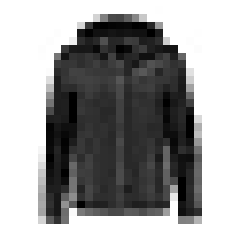

4

In [ ]:
plt.imshow(X_train[0],cmap="binary")
plt.axis("off")
plt.show()
y_train[0]

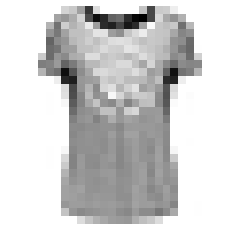

4

In [ ]:
plt.imshow(X_train[1],cmap="binary")
plt.axis("off")
plt.show()
y_train[0]

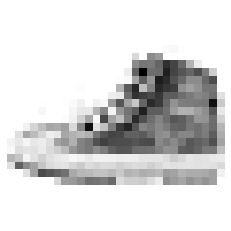

7

In [ ]:
plt.imshow(X_train[2],cmap="binary")
plt.axis("off")
plt.show()
y_train[2]

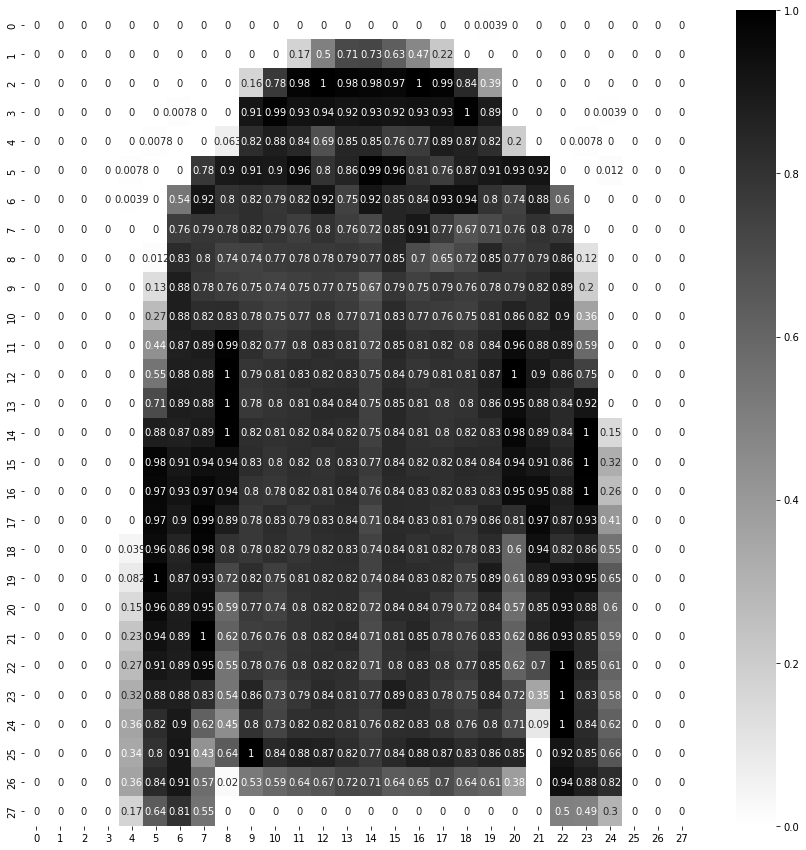

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

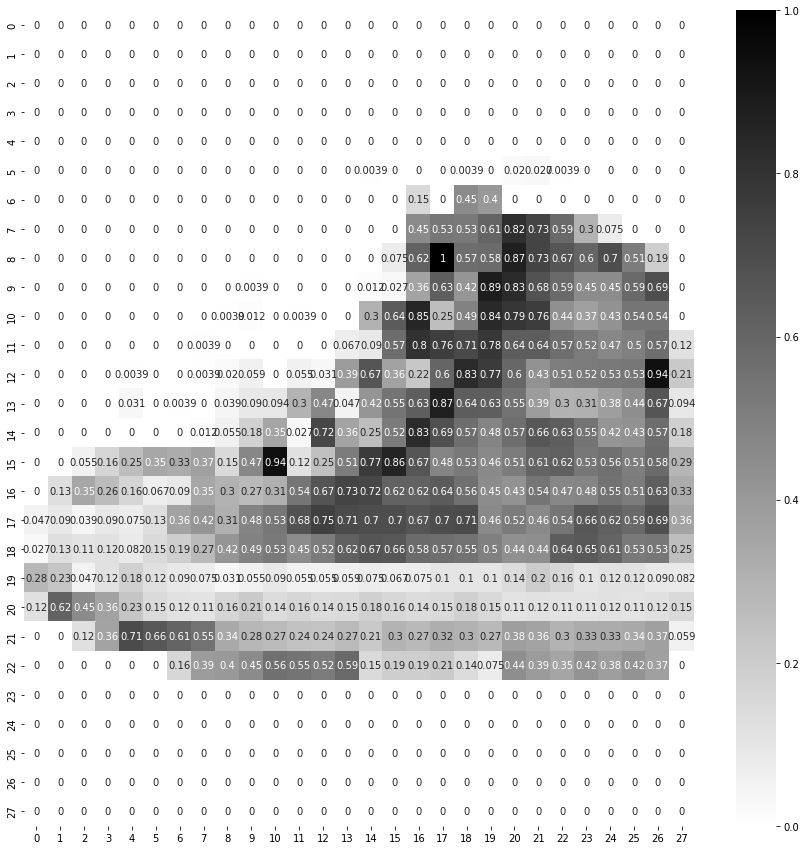

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[2], annot=True, cmap="binary")

In [ ]:
## Making layers for the model

In [ ]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape=[28,28],name = "inputLayers"),
    tf.keras.layers.Dense(300,activation="relu",name="hiddenLayer1"),
    tf.keras.layers.Dense(100,activation="relu",name="hiddenLayers2"),
    tf.keras.layers.Dense(10,activation="softmax",name="outputLayers"),
]

In [ ]:
model = tf.keras.models.Sequential(LAYERS)

In [ ]:
model.layers

In [ ]:
hidden1 = model.layers[1]

In [ ]:
hidden1.get_weights()

[array([[ 0.01848169,  0.0607786 , -0.06457269, ...,  0.02967148,
          0.06292896,  0.0683047 ],
        [-0.00575873, -0.06718437, -0.03702947, ..., -0.06266716,
         -0.04221043, -0.05885991],
        [ 0.03246247,  0.00084677, -0.03127159, ...,  0.04329913,
         -0.05486169, -0.03956513],
        ...,
        [ 0.05751778,  0.04819137, -0.06778088, ..., -0.02860293,
         -0.03947889, -0.03227894],
        [ 0.06284477, -0.06267094,  0.07037464, ...,  0.06769341,
          0.01515501, -0.03268513],
        [-0.07010867, -0.07092866, -0.04169261, ...,  0.02114262,
          0.00995681, -0.03159738]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
loss_function = "sparse_categorical_crossentropy"
optimizer = "SGD"
metrics = ["accuracy"]

model.compile(loss = loss_function,optimizer=optimizer,metrics = metrics)

In [ ]:
EPOCHS = 10
VALIDATION_SET = (X_valid,y_valid)

history = model.fit(X_train,y_train,epochs = EPOCHS,validation_data = VALIDATION_SET)

Epoch 1/10
1719/1719 [==============================] - 8s 3ms/step - loss: 0.7006 - accuracy: 0.7707 - val_loss: 0.5064 - val_accuracy: 0.8270
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4821 - accuracy: 0.8339 - val_loss: 0.4522 - val_accuracy: 0.8444
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4363 - accuracy: 0.8466 - val_loss: 0.4137 - val_accuracy: 0.8552
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4097 - accuracy: 0.8559 - val_loss: 0.3897 - val_accuracy: 0.8610
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3909 - accuracy: 0.8619 - val_loss: 0.3827 - val_accuracy: 0.8660
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3736 - accuracy: 0.8680 - val_loss: 0.4059 - val_accuracy: 0.8592
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3602 - accuracy: 0.8720 - val_loss: 0.3780 - val_accuracy:

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.700589,0.770709,0.506404,0.8270
1,0.482131,0.833909,0.452215,0.8444
2,0.436275,0.846564,0.413745,0.8552
3,0.409723,0.855855,0.389666,0.8610
4,0.390890,0.861891,0.382670,0.8660
5,0.373624,0.867964,0.405873,0.8592
6,0.360157,0.872000,0.378049,0.8662
7,0.349508,0.876455,0.361186,0.8726
8,0.339040,0.879891,0.351343,0.8776
9,0.330654,0.881909,0.366495,0.8714


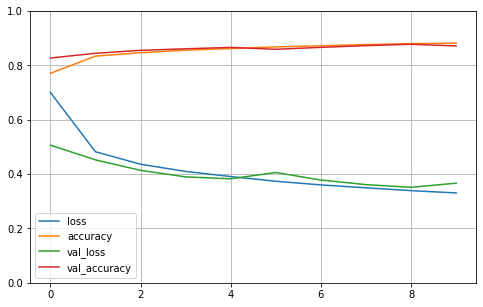

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

**Batch Normalization Approch**

In [ ]:
del model

In [ ]:
LAYER_BN_ONE = [
          tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"),
          
]

In [ ]:
model = tf.keras.models.Sequential(LAYER_BN_ONE)

In [ ]:
model.layers

In [ ]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [ ]:
EPOCHS = 10
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, 
                    validation_data=VALIDATION_SET)

Epoch 1/10
1719/1719 [==============================] - 10s 5ms/step - loss: 0.5277 - accuracy: 0.8148 - val_loss: 0.3737 - val_accuracy: 0.8704
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3924 - accuracy: 0.8603 - val_loss: 0.3463 - val_accuracy: 0.8724
Epoch 3/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3544 - accuracy: 0.8725 - val_loss: 0.3291 - val_accuracy: 0.8770
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3282 - accuracy: 0.8809 - val_loss: 0.3220 - val_accuracy: 0.8806
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3079 - accuracy: 0.8880 - val_loss: 0.3046 - val_accuracy: 0.8868
Epoch 6/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2896 - accuracy: 0.8942 - val_loss: 0.3131 - val_accuracy: 0.8824
Epoch 7/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2745 - accuracy: 0.9002 - val_loss: 0.3053 - val_accuracy

In [ ]:
# Since It show that there is the huge difference between both of them